In [2]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [3]:
library(ggplot2)
library(ggthemes)
library(scales)

In [4]:
summary = read.csv("../data/steps_by_bmi_gender_20170508.csv") 

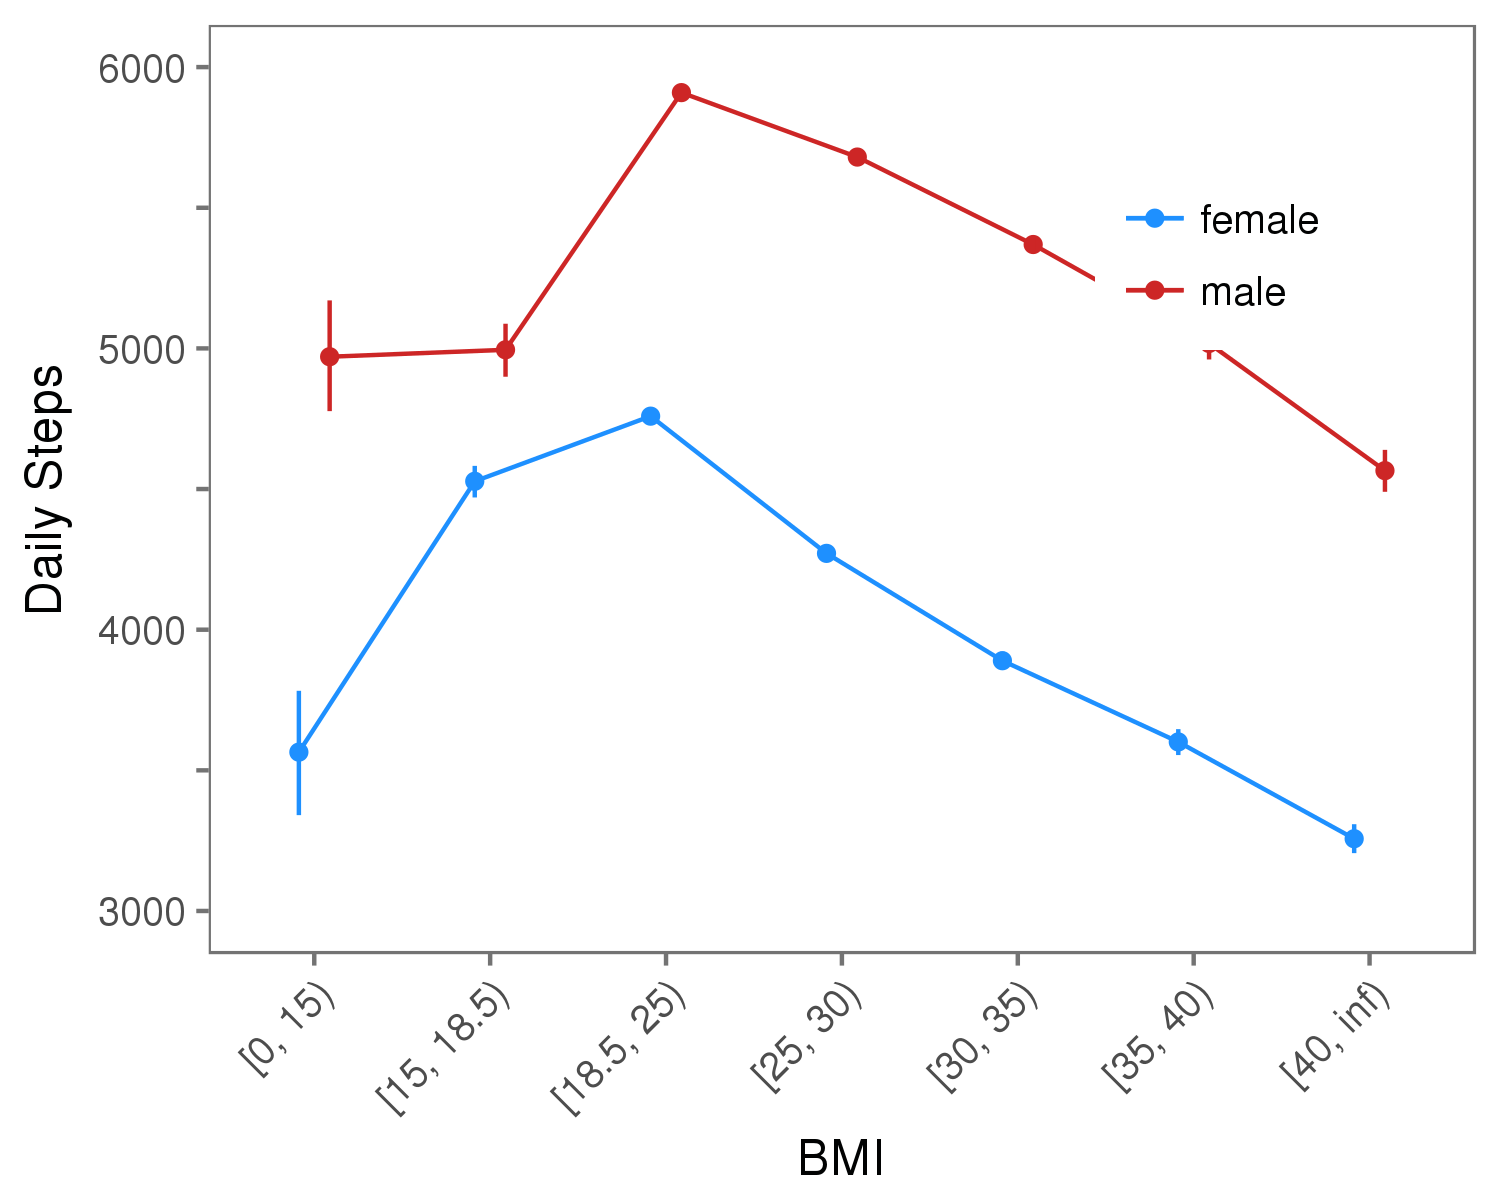

In [5]:
dodgewidth = .35

p <- ggplot(summary, aes(bmi, steps_mean, colour = gender))
p <- p + stat_summary(fun.y = mean, geom = "point", position = position_dodge(width = dodgewidth))
p <- p + stat_summary(fun.y = mean, geom = "line", aes(group=gender), position = position_dodge(width = dodgewidth))
p <- p + geom_errorbar(aes(ymin=lower.ci, ymax=upper.ci), width = 0.0, position = position_dodge(width = dodgewidth))

p <- p + scale_color_manual(values=c("dodgerblue", "firebrick3"))
p <- p + ylab("Daily Steps") + xlab("BMI")
p <- p + labs(colour = "")
p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + theme(legend.justification=c(0,0), legend.position=c(.7,.65))
p <- p + theme(axis.text.x = element_text(angle = 45, hjust = 1))

# yticks
ticks = seq(3000,6000,by=500) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%.0f", ticks[seq(1, length(labels), 2)])
p <- p + scale_y_continuous(breaks=ticks, labels=labels)
p <- p + coord_cartesian(ylim=c(3000,6000))

p

ggsave(filename="../output/edfig1b.pdf", plot=p, width=4, height=3)